In [20]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import stylecloud
import os
from IPython.display import Image

In [21]:
# Load data
def load_data(file_name):
    data = pd.read_csv(file_name, delimiter=",")
    return data

file_name = 'tweets-data/labeled_dataset_kurikulum_merdeka2.csv'
df = load_data(file_name)
df.head(-4)

,full_text,filtered,cleaned,tokenize,normalisasi,sentiment_label,sentiment_score
0,Selamat hari guru jg buat calon guru yang cape...,selamat hari guru jg buat calon guru yang cape...,selamat hari guru jg calon guru capek bgt ma k...,"['selamat', 'hari', 'guru', 'jg', 'calon', 'gu...",selamat hari guru juga calon guru kesal sekali...,negative,0.999239
1,@mediaindonesia Bukannya kurikulum merdeka mau...,bukannya kurikulum merdeka mau diganti buu,bukan kurikulum merdeka ganti buu,"['bukan', 'kurikulum', 'merdeka', 'ganti', 'buu']",bukan kurikulum merdeka ganti buu,negative,0.997182
2,@syahrindraaa @GhibahNaqMetal For Kurikulum Me...,for kurikulum merdeka,for kurikulum merdeka,"['for', 'kurikulum', 'merdeka']",untuk kurikulum merdeka,neutral,0.997534
3,Modul ajar ‍‍‍ Duhhh siapa yang udah dah perna...,modul ajar duhhh siapa yang udah dah pernah bi...,modul ajar duhhh siapa udah pernah modul ajar ...,"['modul', 'ajar', 'duhhh', 'siapa', 'udah', 'p...",modul ajar duhhh siapa sudah pernah modul ajar...,neutral,0.898265
4,Guru yang baik adalah guru yang merdeka dari k...,guru yang baik adalah guru yang merdeka dari k...,guru baik adalah guru merdeka kurikulum bukan ...,"['guru', 'baik', 'adalah', 'guru', 'merdeka', ...",guru baik adalah guru merdeka kurikulum bukan ...,negative,0.925042
...,...,...,...,...,...,...,...
2256,Mengganti Kurikulum Merdeka Menata Ulang Arah ...,mengganti kurikulum merdeka menata ulang arah ...,ganti kurikulum merdeka tata ulang arah didik ...,"['ganti', 'kurikulum', 'merdeka', 'tata', 'ula...",ganti kurikulum merdeka tata ulang arah didik ...,neutral,0.998974
2257,@tekarok007 @BuzzerShestar Indonesia ini cocok...,indonesia ini cocoknya ada un udah terbukti ga...,indonesia cocok ada un udah bukti gaada un sis...,"['indonesia', 'cocok', 'ada', 'un', 'udah', 'b...",indonesia cocok ada un sudah bukti tidak ada u...,negative,0.999416
2258,Kegiatan Penyerahan Sertifikat Pelaksana Kurik...,kegiatan penyerahan sertifikat pelaksana kurik...,giat serah sertifikat laksana kurikulum merdek...,"['giat', 'serah', 'sertifikat', 'laksana', 'ku...",giat serah sertifikat laksana kurikulum merdek...,positive,0.920891
2259,@kegblgnunfaedh Hidup Kurikulum Merdeka.. Hidu...,hidup kurikulum merdeka hidup anak cengeng hid...,hidup kurikulum merdeka hidup anak cengeng hid...,"['hidup', 'kurikulum', 'merdeka', 'hidup', 'an...",hidup kurikulum merdeka hidup anak cengeng hid...,negative,0.498702


In [22]:
# Map labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment_label'].map(label_mapping)

# Split features and labels
X = df['normalisasi']
y = df['label']

In [23]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [24]:
# SVM Model
svm = SVC(kernel='linear', class_weight='balanced', decision_function_shape='ovr')
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

Akurasi: 0.7417218543046358
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.78      0.76       222
     neutral       0.77      0.77      0.77       206
    positive       0.25      0.16      0.20        25

    accuracy                           0.74       453
   macro avg       0.59      0.57      0.58       453
weighted avg       0.73      0.74      0.74       453



In [25]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies, confusion_matrices, classification_reports = [], [], []

for train_idx, test_idx in kf.split(X_vec):
    X_train, X_test = X_vec[train_idx], X_vec[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    cr = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'], output_dict=True)
    classification_reports.append(cr)

# Average Metrics
print("Akurasi untuk setiap fold:", fold_accuracies)
print("Rata-rata Akurasi:", np.mean(fold_accuracies))
print("Confusion Matrix rata-rata:\n", np.mean(confusion_matrices, axis=0))

precision_avg = np.mean([cr['weighted avg']['precision'] for cr in classification_reports])
recall_avg = np.mean([cr['weighted avg']['recall'] for cr in classification_reports])
f1_score_avg = np.mean([cr['weighted avg']['f1-score'] for cr in classification_reports])

print(f"Rata-rata Precision: {precision_avg:.2f}")
print(f"Rata-rata Recall: {recall_avg:.2f}")
print(f"Rata-rata F1-Score: {f1_score_avg:.2f}")

Akurasi untuk setiap fold: [0.7417218543046358, 0.7704194260485652, 0.7660044150110376, 0.7527593818984547, 0.7549668874172185]
Rata-rata Akurasi: 0.7571743929359823
Confusion Matrix rata-rata:
 [[176.8  37.    7.8]
 [ 44.  160.6   3.6]
 [ 12.2   5.4   5.6]]
Rata-rata Precision: 0.75
Rata-rata Recall: 0.76
Rata-rata F1-Score: 0.75


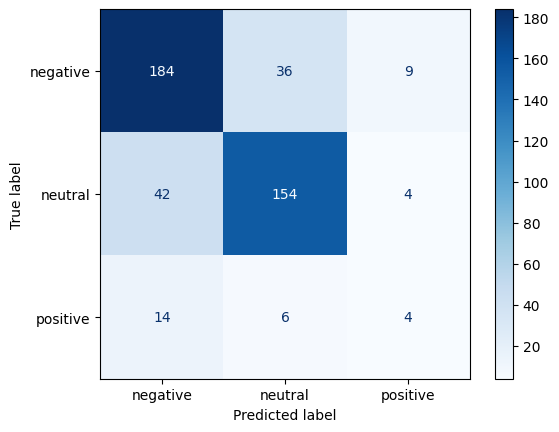

In [26]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap='Blues')

In [27]:
# Filter and save positive tweets
df[df['sentiment_label'] == 'positive']['normalisasi'].to_csv('positive_tweets.csv', index=False)

# Filter and save negative tweets
df[df['sentiment_label'] == 'negative']['normalisasi'].to_csv('negative_tweets.csv', index=False)

# Filter and save neutral tweets
df[df['sentiment_label'] == 'neutral']['normalisasi'].to_csv('neutral_tweets.csv', index=False)


In [38]:
stylecloud.gen_stylecloud(file_path='negative_tweets.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.sequential.Reds_9',
                          background_color='black',
                          gradient='horizontal',
                          output_name='wordcloud_negative.png')

In [40]:
stylecloud.gen_stylecloud(file_path='positive_tweets.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.sequential.Greens_9',
                          background_color='black',
                          gradient='horizontal',
                          output_name='wordcloud_positive.png')

In [43]:
stylecloud.gen_stylecloud(file_path='neutral_tweets.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.sequential.Blues_9',
                          background_color='black',
                          gradient='horizontal',
                          output_name='wordcloud_neutral.png')

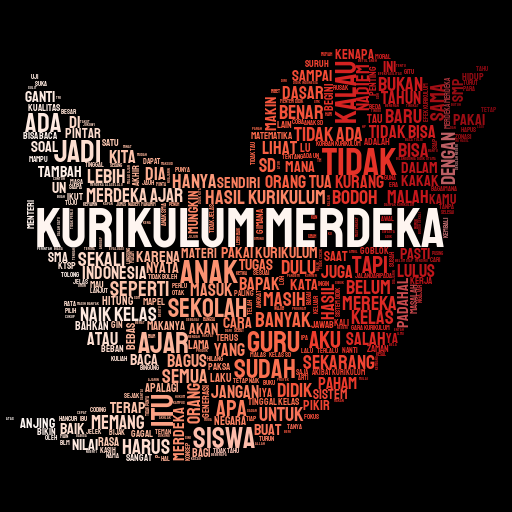

In [39]:
Image('wordcloud_negative.png')

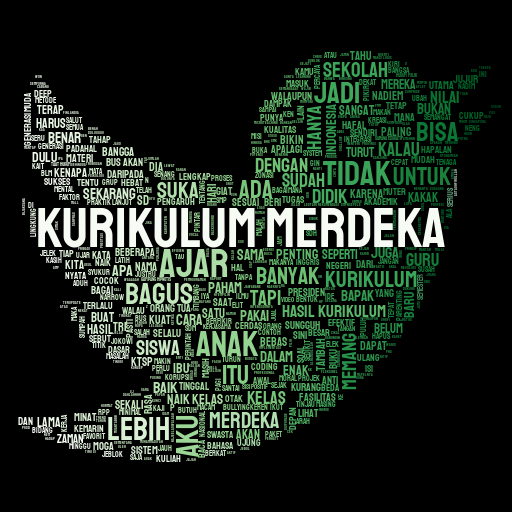

In [41]:
Image('wordcloud_positive.png')

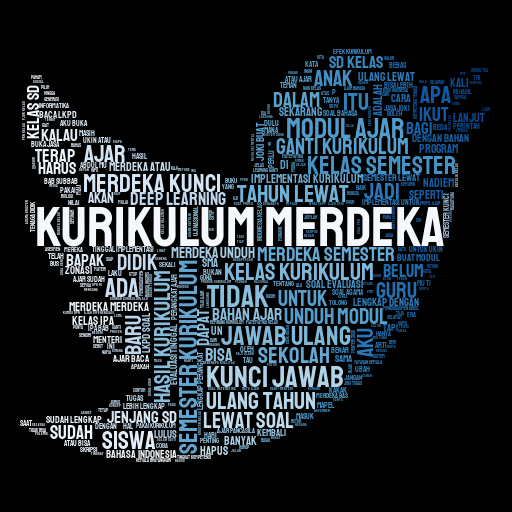

In [44]:
Image('wordcloud_neutral.png')